# Árvores de Decisão: Classificação

In [1]:
# Importação das bibliotecas

In [2]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacontes gráficos
import matplotlib.pyplot as plt 
import seaborn as sns 

# Pacote de modelagem estatística
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('iris2.csv', sep=',')

In [6]:
df.Tipo_Orquidea.unique()

array([0, 1], dtype=int64)

In [7]:
df.head()


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Preparação dos Dados

In [9]:
# Dados faltantes 
df.isnull().sum()

comprimento_sepala    0
largura_sepala        0
comprimento_petala    0
largura_petala        0
Tipo_Orquidea         0
dtype: int64

In [11]:
# Duplicações
df.duplicated().sum()

1

In [13]:
df.loc[df.duplicated()]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
142,5.8,2.7,5.1,1.9,0


## Análise Exploratória dos Dados

C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

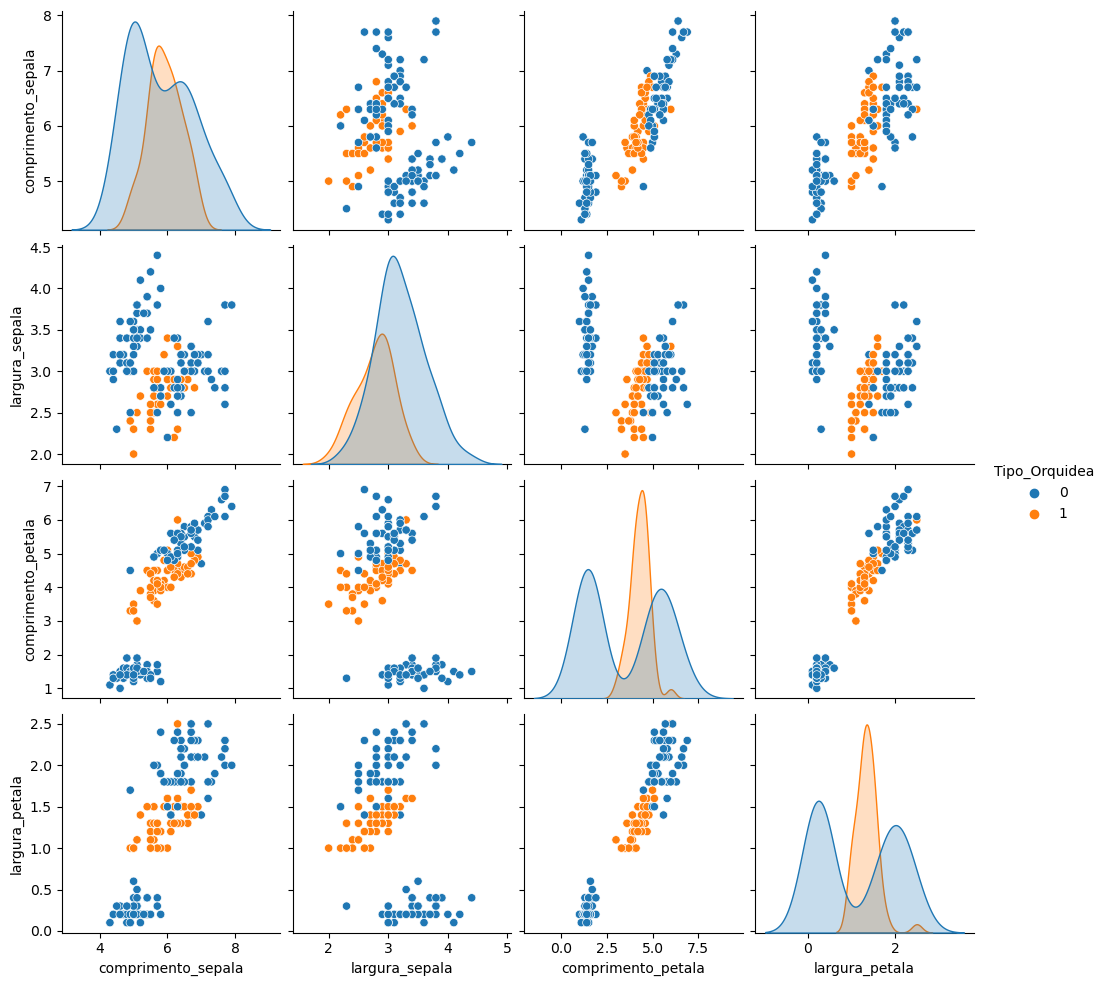

In [16]:
sns.pairplot(df,hue = 'Tipo_Orquidea')

# Modelo :Árvores de Decisão (Modelo Supervisionado)

In [19]:
# Target(variável resposta)
y = df['Tipo_Orquidea']

# Features (Variáveis explicativas)
x = df.drop('Tipo_Orquidea', axis = 1)

In [32]:
modelo = DecisionTreeClassifier(max_depth=2, random_state=42)
modelo.fit(x,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

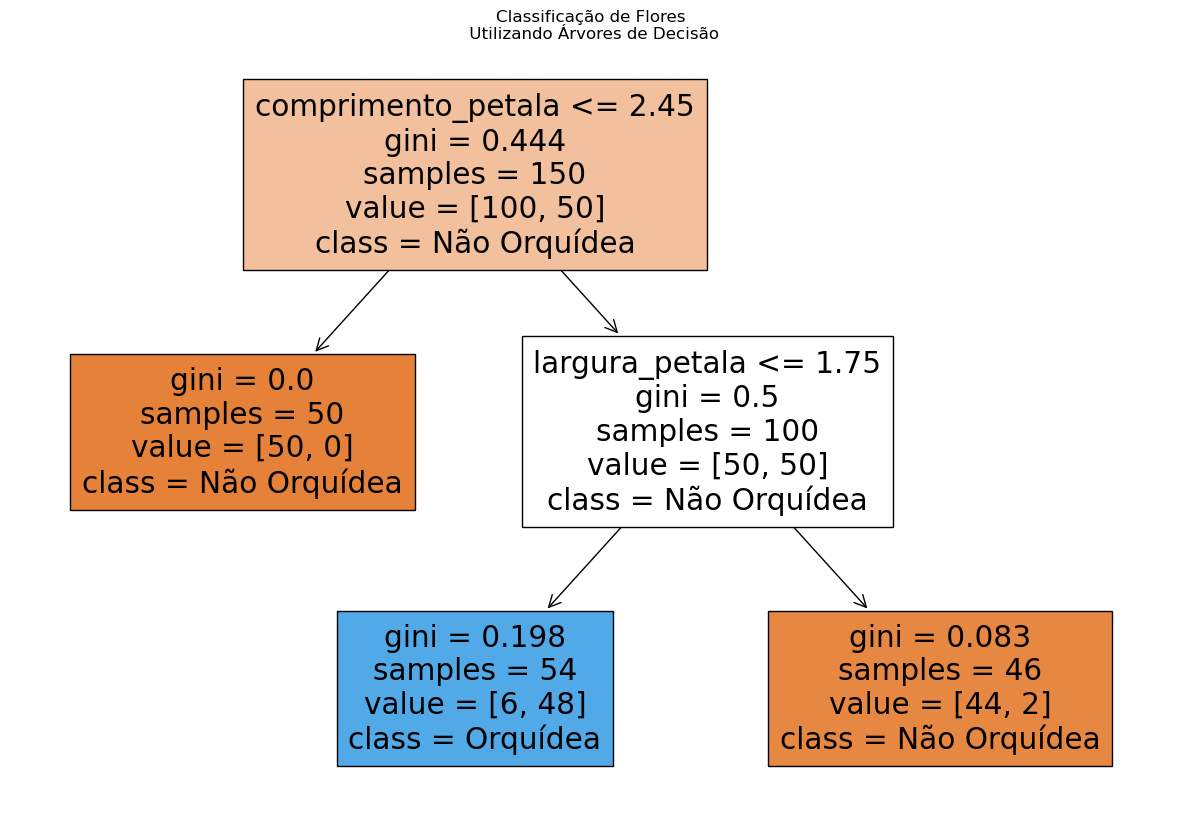

In [33]:
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo,
               feature_names=features,
               class_names=['Não Orquídea', 'Orquídea'],
               filled=True);
plt.title('Classificação de Flores\n Utilizando Árvores de Decisão');

# Desempenho do Modelo

In [34]:
round(accuracy_score(y, modelo.predict(x)),2)

0.95